In [1]:
import pandas as pd
import os
import random
from collections import Counter

In [2]:
for f in os.listdir():
    print(f)

.ipynb_checkpoints
BigramLM
names.txt
Untitled.ipynb
WordCloud.png


In [3]:
names = []
with open('names.txt', encoding='utf8') as f:
    for line in f:
        #print(line)
        names.append(line.replace('\n', ''))

In [4]:
len(names)

32033

In [5]:
#names = ['кот']

In [6]:
bigrams = []
for n in names:
    #line_names = []
    for i in range(len(n)):
        if i == 0:
            bigrams.append('^' + n[i])
        else:
            bigrams.append(n[i-1] + n[i])
            
        if i == len(n)-1:
            bigrams.append(n[i] + '$')
    #biagrams.append(line_names)

In [7]:
len(bigrams)

['^e',
 'em',
 'mm',
 'ma',
 'a$',
 '^o',
 'ol',
 'li',
 'iv',
 'vi',
 'ia',
 'a$',
 '^a',
 'av',
 'va',
 'a$',
 '^i',
 'is',
 'sa',
 'ab',
 'be',
 'el',
 'll',
 'la',
 'a$',
 '^s',
 'so',
 'op',
 'ph',
 'hi',
 'ia',
 'a$',
 '^c',
 'ch',
 'ha',
 'ar',
 'rl',
 'lo',
 'ot',
 'tt',
 'te',
 'e$',
 '^m',
 'mi',
 'ia',
 'a$',
 '^a',
 'am',
 'me',
 'el',
 'li',
 'ia',
 'a$',
 '^h',
 'ha',
 'ar',
 'rp',
 'pe',
 'er',
 'r$',
 '^e',
 'ev',
 've',
 'el',
 'ly',
 'yn',
 'n$',
 '^a',
 'ab',
 'bi',
 'ig',
 'ga',
 'ai',
 'il',
 'l$',
 '^e',
 'em',
 'mi',
 'il',
 'ly',
 'y$',
 '^e',
 'el',
 'li',
 'iz',
 'za',
 'ab',
 'be',
 'et',
 'th',
 'h$',
 '^m',
 'mi',
 'il',
 'la',
 'a$',
 '^e',
 'el',
 'll',
 'la',
 'a$',
 '^a',
 'av',
 've',
 'er',
 'ry',
 'y$',
 '^s',
 'so',
 'of',
 'fi',
 'ia',
 'a$',
 '^c',
 'ca',
 'am',
 'mi',
 'il',
 'la',
 'a$',
 '^a',
 'ar',
 'ri',
 'ia',
 'a$',
 '^s',
 'sc',
 'ca',
 'ar',
 'rl',
 'le',
 'et',
 'tt',
 't$',
 '^v',
 'vi',
 'ic',
 'ct',
 'to',
 'or',
 'ri',
 'ia',
 'a$',

In [8]:
ccc = 0
l = len(bigrams)
nbg = Counter(bigrams)

for k, v in nbg.items():
    ccc += v
    
print(ccc/l)

1.0


In [9]:
cc = 0
for key in nbg.keys():
    nbg[key] = nbg[key] / l
    cc += nbg[key]
    
print(cc)

0.9999999999999991


In [10]:
bg = Counter(bigrams)

In [11]:
l = len(bigrams)

In [12]:
for key in bg.keys():
    bg[key] = bg[key]/l

In [13]:
len(bg)

627

In [14]:
first_keys, first_values = [], []
for key, value in bg.items():
    if '^' in key:
        first_keys.append(key)
        first_values.append(value)

last_keys, last_values = [], []
for key, value in bg.items():
    if '$' in key:
        last_keys.append(key)
        last_values.append(value)


In [15]:
first_letter = random.choices(first_keys, weights=first_values)[0].replace('^', '')
print(first_letter)

last_letter = random.choices(last_keys, weights=last_values)[0].replace('$', '')
print(last_letter)

a
n


In [16]:
df = pd.DataFrame(bg.items(), columns=['Bigram', 'Probability'])
df.shape

,Bigram,Probability
0,^e,0.006711
1,em,0.003371
2,mm,0.000736
3,ma,0.011352
4,a$,0.029104
...,...,...
622,zd,0.000009
623,xm,0.000004
624,wg,0.000004
625,tb,0.000004


In [17]:
#df['Bigram'].str.startswith('^')

0       True
1      False
2      False
3      False
4      False
       ...  
622    False
623    False
624    False
625    False
626    False
Name: Bigram, Length: 627, dtype: bool

In [18]:
df[df['Bigram'].str.startswith('^')]

,Bigram,Probability
0,^e,0.006711
5,^o,0.001727
11,^a,0.019330
14,^i,0.002590
22,^s,0.009007
27,^c,0.006759
37,^m,0.011124
41,^h,0.003831
71,^v,0.001648
79,^l,0.006890


In [21]:
def get_next(letter):
    next_letter = random.choices(list(df[df['Bigram'].str.startswith(letter)]['Bigram']), 
                                 weights=list(df[df['Bigram'].str.startswith(letter)]['Probability']))[0][1]
    
    return next_letter
    

def generate(min_len = 3, max_len = 10):
    new_name = get_next('^')
    loop = 0
    while len(new_name) <= max_len:
        new_name += get_next(new_name[-1])
        if new_name[-1] == '$':
            new_name = new_name[:-1]
            if len(new_name) >= min_len:
                break       
    
    return new_name

In [22]:
generate()

'muna'

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [24]:
bg

Counter({'^e': 0.006710615132415208,
         'em': 0.003370648619743498,
         'mm': 0.0007363705697228968,
         'ma': 0.011352379616561326,
         'a$': 0.02910417013666687,
         '^o': 0.0017269643123263173,
         'ol': 0.0027131748967766257,
         'li': 0.010870232219718952,
         'iv': 0.0011790695431872574,
         'vi': 0.00399305707748547,
         'ia': 0.010716821684360014,
         '^a': 0.01932972745522604,
         'av': 0.003655553899695809,
         'va': 0.0028139875342982124,
         '^i': 0.002590446468489476,
         'is': 0.0057682361294960245,
         'sa': 0.005264172941888089,
         'ab': 0.002371288560833852,
         'be': 0.002870968590288675,
         'el': 0.014236497681309338,
         'll': 0.005895347715936286,
         'la': 0.011497023835614037,
         '^s': 0.009007390004646147,
         'so': 0.0023274569793027273,
         'op': 0.00041640002454568567,
         'ph': 0.000894164263234946,
         'hi': 0.003195322293618

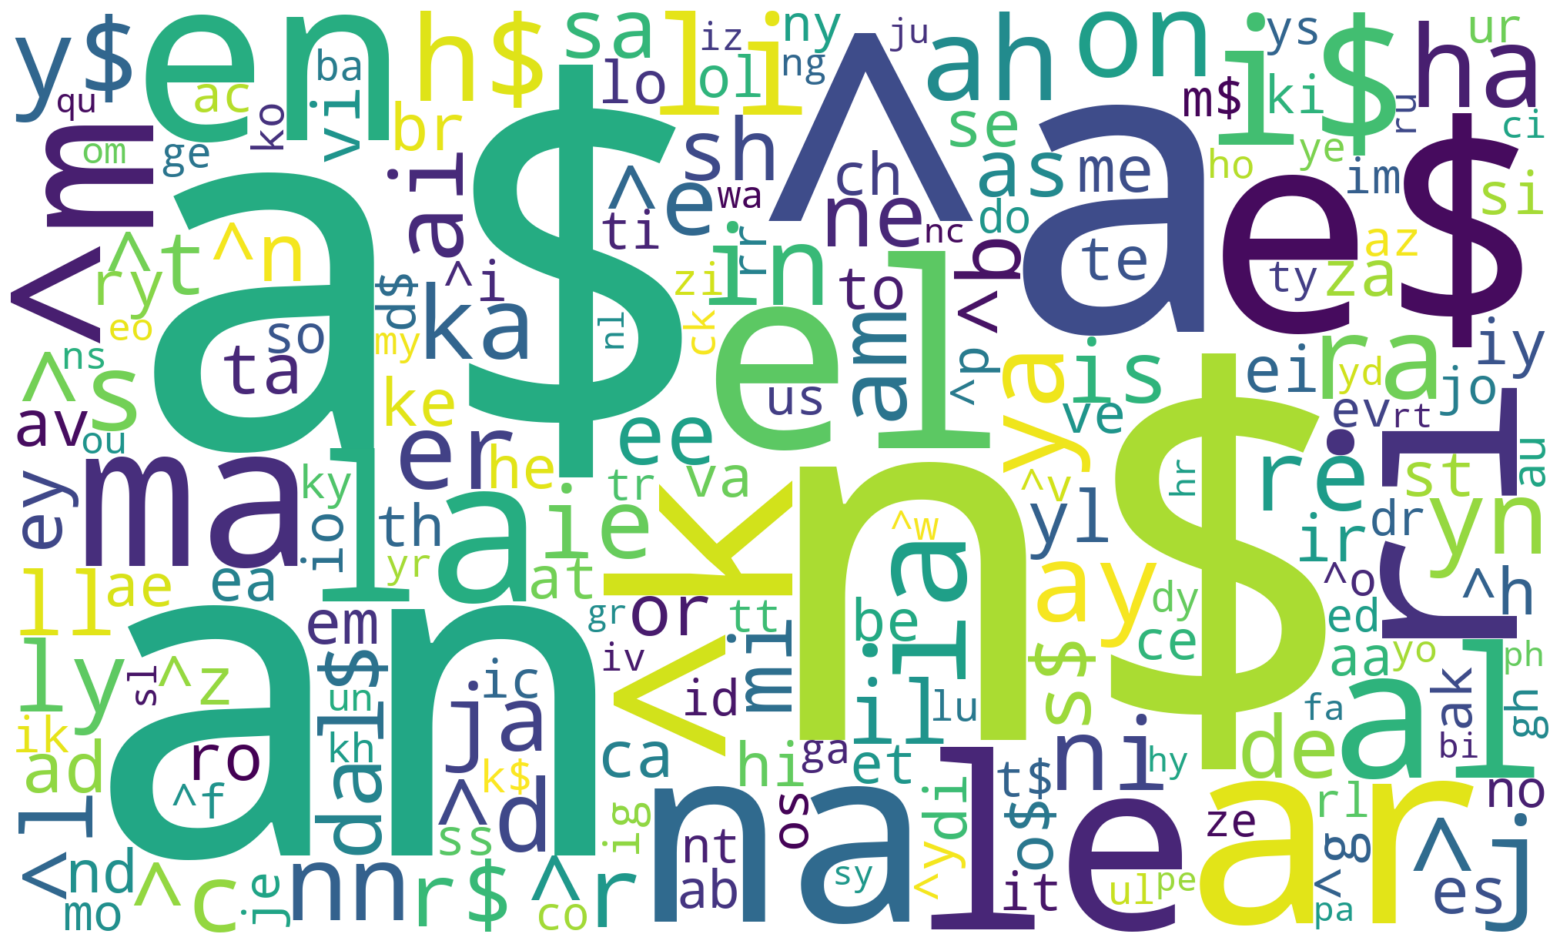

In [25]:
wordcloud = WordCloud(width=2000, height=1200, background_color="white").generate_from_frequencies(bg)
plt.rcParams["figure.figsize"] = (20, 12)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
#plt.savefig('WordCloud.png', bbox_inches='tight')
plt.show()

In [26]:
sum(df['Probability'])

0.9999999999999991